<a href="https://colab.research.google.com/github/kamsur/ryverAi_workshop/blob/main/Makethon_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers transformers torch accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 18.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinu

# Load a pretrained model from **HuggingFace** that generates a 2D slice of brain MRI

In [2]:
import torch
from diffusers import DDPMPipeline

repo_id = "SafaAsgar/diffusion_normal_mri"
ddpm_pipeline = DDPMPipeline.from_pretrained(repo_id).to('cuda')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

# Generate a synthetic image

In [9]:
"""
ToDo:
  - initialize a torch generator on the gpu;
  - optionally set the seed for generating random numbers to your generator;
  - generate an image by passing the generator to the priviously loaded ddpm pipeline;
  - vary the number of inference steps from 1 to 1000 (some old versions of DDPMPipeline do not allow controlling the number of inference steps,
                                                        make sure to use the latest versions of documentation).
"""

### Your code ...
generator=torch.Generator(device='cuda').manual_seed(42)
ddpm_sampling=ddpm_pipeline(num_inference_steps=1000,generator=generator)
image = ddpm_sampling.images[0]

  0%|          | 0/1000 [00:00<?, ?it/s]

# Visualize the result

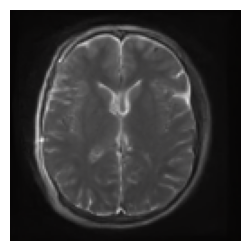

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(image)
plt.axis('off')
plt.show()

# Generate a 2D slice of brain MRI with Parkinson's disease

In [15]:
"""
ToDo:
  - Now repeat the sampling process with a model that generates brain MRI with Parkinson's disease.
"""

repo_id_parkinson = "SafaAsgar/diffusion_parkinson_mri"

# Your code ...
ddpm_pipeline_parkinson = DDPMPipeline.from_pretrained(repo_id_parkinson).to('cuda')
generator_parkinson=torch.Generator(device='cuda')
ddpm_sampling_parkinson=ddpm_pipeline(generator=generator_parkinson)
image_parkinson = ddpm_sampling_parkinson.images[0]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

# Plot both images and their difference

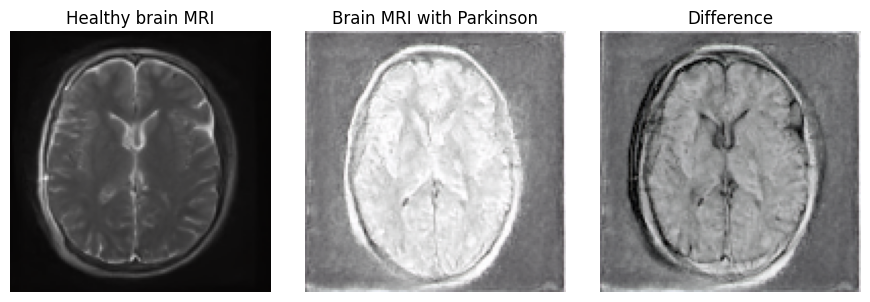

In [16]:
"""
Run this cell to visually compare the images. Is the quality of synthetic images sufficient?
If not, repeat the sampling process, adjust the number of iterations and set a different seed.
"""
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# Display the healthy image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Healthy brain MRI')
axes[0].axis('off')

# Display the image with Parkinson
axes[1].imshow(image_parkinson, cmap='gray')
axes[1].set_title('Brain MRI with Parkinson')
axes[1].axis('off')

# Display the difference image
difference = np.abs(np.array(image, dtype=int) - np.array(image_parkinson, dtype=int))
difference = np.clip(difference, 0, 255)
axes[2].imshow(difference, cmap='gray')
axes[2].set_title('Difference')
axes[2].axis('off')

plt.tight_layout()
plt.show()
